In [2]:
import pandas as pd

In [3]:
anime_data = pd.read_csv('anime_with_synopsis.csv')

## Exploring  and Cleaning data

In [4]:
anime_data.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [5]:
anime_data['length'] = anime_data['sypnopsis'].str.len()

In [6]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MAL_ID     16214 non-null  int64  
 1   Name       16214 non-null  object 
 2   Score      16214 non-null  object 
 3   Genres     16214 non-null  object 
 4   sypnopsis  16206 non-null  object 
 5   length     16206 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 760.2+ KB


In [7]:
anime_data.shape

(16214, 6)

In [8]:
anime_data.isna().sum()

MAL_ID       0
Name         0
Score        0
Genres       0
sypnopsis    8
length       8
dtype: int64

In [9]:
anime_data[anime_data['sypnopsis'].isna()]

,MAL_ID,Name,Score,Genres,sypnopsis,length
11451,34755,Kuma no Gakkou: Patissier Jackie to Ohisama no...,Unknown,"Comedy, Kids",NaN,NaN
11469,34794,Yukai na Animal Bus,Unknown,"Comedy, Kids",NaN,NaN
13686,38475,Yuru Camp△ Movie,Unknown,"Comedy, Slice of Life",NaN,NaN
15025,40714,Youkai Watch Jam: Youkai Gakuen Y - N to no So...,6.28,"Comedy, Demons, Kids, Supernatural, School",NaN,NaN
15747,42717,Kaeru no Pickles: Kimochi no Iro,Unknown,"Slice of Life, Kids",NaN,NaN
16056,44848,Iii Icecrin,Unknown,Kids,NaN,NaN
16110,45731,Argonavis from BanG Dream! Movie,Unknown,Music,NaN,NaN
16120,46095,Vivy: Fluorite Eye's Song,Unknown,Sci-Fi,NaN,NaN


### ตัดสินใจ drop ข้อมูลที่ synopsis ว่างทั้งหมด เพราะมองว่าเป็นส่วนน้อยของข้อมูล และยังมี Score ที่ไม่รู้ส่วนใหญ่

In [10]:
anime_data.dropna(inplace=True)

In [11]:
anime_data.shape

(16206, 6)

In [12]:
no_inform_syp = anime_data[anime_data['sypnopsis'].str.contains('No synopsis information')]
no_inform_syp.head()

,MAL_ID,Name,Score,Genres,sypnopsis,length
2225,2626,The☆Doraemons: Mushimushi Pyonpyon Daisakusen!,6.27,Fantasy,No synopsis information has been added to this...,107.0
2226,2627,Doraemon: It's New Year!,6.49,"Kids, Comedy, Sci-Fi, Shounen",No synopsis information has been added to this...,107.0
2227,2628,"The☆Doraemons: Strange, Sweets, Strange?",6.29,Fantasy,No synopsis information has been added to this...,107.0
2228,2629,Doraemon and Itchy the Stray,6.35,"Comedy, Kids, Sci-Fi, Shounen",No synopsis information has been added to this...,107.0
2231,2632,Doraemon: Time Machine de Oshougatsu,6.41,"Sci-Fi, Adventure, Comedy, Kids, Shounen",No synopsis information has been added to this...,107.0


In [13]:
no_inform_syp.shape

(709, 6)

### และมี Synopsis ที่ไม่มีข้อมูล 709 เรื่อง ซึ่งมีบางเรื่องที่ไม่รู้ข้อมูล Genres เช่นเดียวกัน
### โดยเขียนลงในคอลลัมน์ Synopsis ของข้อมูลว่า No synopsis information ...

In [14]:
anime_data.drop(no_inform_syp.index,inplace=True)

In [15]:
unk_genre = anime_data[anime_data['Genres'].str.contains('Unknown')]
unk_genre.head()

,MAL_ID,Name,Score,Genres,sypnopsis,length
8759,28487,Ikite Iru,Unknown,Unknown,Tsuyoshi is 9 years old and had friends over t...,342.0
8807,28653,Maze,Unknown,Unknown,stract stop motion animation by Tochka.,39.0
8808,28655,PiKA PiKA,5.12,Unknown,"stract short film, the first ""lightning doodle...",63.0
9049,29655,Chanda Gou,Unknown,Unknown,"Independent animation by Yanagihara Ryouhei, m...",122.0
9101,29765,Metropolis (2009),5.93,Unknown,ai Mizue's first time experimenting with geome...,61.0


In [16]:
unk_genre.shape

(42, 6)

In [17]:
anime_data.drop(unk_genre.index,inplace=True)

### จากการสำรวจข้อมูลเบื้องต้นทำให้พบว่ามี Genres ที่ไม่รู้ข้อมูล 42 เรื่อง (หลังจากที่ลบข้อมูลที่ไม่มี Synopsis)

### เนื่องจากข้อมูลเหล่านี้มีผลกับการทำฟังก์ชั่นเรียงลำดับอนิเมะที่มี Synopsis ที่คล้ายกัน จึงตัดสินใจ Drop ทั้งหมด
### ทั้งในส่วนของ Genres 'Unknown' และ Synopsis 'No synopsis information'

In [18]:
anime_data.shape

(15455, 6)

In [19]:
anime_data[anime_data['Score'].isin(['Unknown'])].head()

,MAL_ID,Name,Score,Genres,sypnopsis,length
1347,1547,Obake no Q-tarou,Unknown,"Comedy, School, Slice of Life, Supernatural","Q-taro, a monster, is living with the Ohara fa...",255.0
1439,1656,PostPet Momobin,Unknown,"Comedy, Kids","omo and Komomo can deliver mail from anyone, t...",385.0
1512,1739,Shibawanko no Wa no Kokoro,Unknown,Kids,Based on a japanese children`s book by Yoshie ...,838.0
1619,1863,Silk Road Shounen Yuuto,Unknown,"Adventure, Fantasy, Historical","hen a boy Yuto visits Qinghai in China, he is ...",434.0
1808,2073,Hengen Taima Yakou Karura Mau! Sendai Kokeshi ...,Unknown,"Horror, Shoujo",Shoko and Maiko Ougi are apparently two ordina...,438.0


In [20]:
anime_data[anime_data['Score'].isin(['Unknown'])].shape

(4556, 6)

### มีข้อมูล 4556 แถวของคอลลัมน์ Score ที่เป็นค่า Unknown 

In [21]:
score_known = anime_data[~anime_data['Score'].isin(['Unknown'])]

In [22]:
score_known.shape

(10899, 6)

In [23]:
per_unk = 1-score_known.size/anime_data.size
print('unknown score is %.2f of data' %per_unk)

unknown score is 0.29 of data


#### คิดเป็น 29% ของข้อมูล ที่ไม่รู้คะแนนของ Anime

In [24]:
score_known['Score'] = score_known['Score'].astype(float)

<ipython-input-24-17c3b29058f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_known['Score'] = score_known['Score'].astype(float)


In [25]:
score_known.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10899 entries, 0 to 16204
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MAL_ID     10899 non-null  int64  
 1   Name       10899 non-null  object 
 2   Score      10899 non-null  float64
 3   Genres     10899 non-null  object 
 4   sypnopsis  10899 non-null  object 
 5   length     10899 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 596.0+ KB


## Score distribution

<AxesSubplot:>

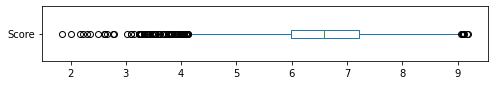

In [26]:
score_known['Score'].plot(kind='box', vert=False, figsize=(8, 1))

<AxesSubplot:ylabel='Frequency'>

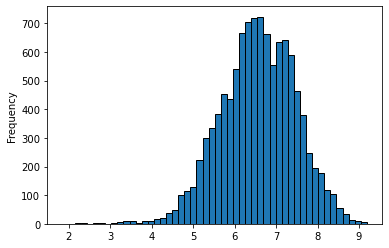

In [27]:
score_known['Score'].plot(kind='hist', bins=50, figsize=(6, 4), edgecolor='k')

In [28]:
score_mean = round(score_known['Score'].mean(),2)
score_mean

6.56

### การกระจายตัวของคะแนนอนิเมะมีการกระจายตัวแบบปกติ ในที่นี้ จะใช้ ค่า Mean ในการแทนที่ค่า Unknown

In [29]:
anime_data['Score'].replace('Unknown',score_mean,inplace=True)

In [30]:
anime_data['Score'].unique #Check

<bound method Series.unique of 0        8.78
1        8.39
2        8.24
3        7.27
4        6.98
         ... 
16207    6.56
16210    6.56
16211    6.56
16212    6.56
16213    6.56
Name: Score, Length: 15455, dtype: object>

In [31]:
anime_data['Score'] = anime_data['Score'].astype(float)

In [32]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15455 entries, 0 to 16213
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MAL_ID     15455 non-null  int64  
 1   Name       15455 non-null  object 
 2   Score      15455 non-null  float64
 3   Genres     15455 non-null  object 
 4   sypnopsis  15455 non-null  object 
 5   length     15455 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 845.2+ KB


## Length of synopsis distribution

<AxesSubplot:>

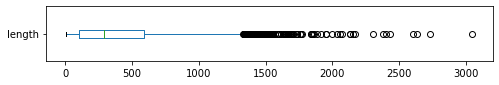

In [33]:
anime_data['length'].plot(kind='box', vert=False, figsize=(8, 1))

<AxesSubplot:ylabel='Frequency'>

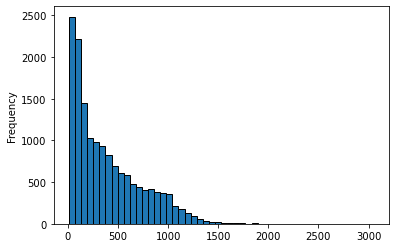

In [34]:
anime_data['length'].plot(kind='hist', bins=50, figsize=(6, 4), edgecolor='k')

### จากข้อมูล ความยาวของ synopsis มีการกระจายตัวที่เบ้ขวา

In [35]:
anime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MAL_ID,15455.0,21544.024911,14826.834100,1.00,6280.50,23177.00,35521.50,48492.00
Score,15455.0,6.561288,0.756400,1.85,6.25,6.56,6.93,9.19
length,15455.0,389.967972,342.880362,10.00,104.00,287.00,593.00,3047.00


### Check duplicated

In [36]:
anime_data[anime_data['Name'].duplicated()]

,MAL_ID,Name,Score,Genres,sypnopsis,length
12347,36296,Hinamatsuri,8.21,"Comedy, Sci-Fi, Seinen, Slice of Life, Superna...",hile reveling in the successful clinching of a...,1188.0
14117,39143,Youkoso! Ecolo Shima,6.56,Kids,vironmental education film aimed at children. ...,136.0
16196,48417,Maou Gakuin no Futekigousha: Shijou Saikyou no...,6.56,"Magic, Fantasy, School",Second season of Maou Gakuin no Futekigousha: ...,124.0
16197,48418,Maou Gakuin no Futekigousha: Shijou Saikyou no...,6.56,"Action, Demons, Magic, Fantasy, School",Second half of Maou Gakuin no Futekigousha: Sh...,133.0


### Maou Gakuin

In [37]:
maou = anime_data[anime_data['Name'].str.contains('Maou Gakuin no Futekigousha: Shijou Saikyou')]['Name']

In [38]:
for i in maou:
    print(i)

Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e
Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e
Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e


In [39]:
maou_syp = anime_data[anime_data['Name']
           .isin(['Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e'])]['sypnopsis']

In [40]:
for i in maou_syp:
    print(i)
    print(' ')

In the distant past, a war between humans and demons brought about widespread chaos and bloodshed. To put an end to this seemingly endless conflict, Demon King Anos Voldigoad willingly sacrificed his life, hoping to be reborn in a peaceful future. In preparation for their king's return, the demon race created the Demon King Academy, an elite institution tasked with determining Anos' identity when he reawakens. He reincarnates two millennia later, but to his surprise, he soon learns that the level of magic in the world has drastically waned during his absence. Moreover, when he enrolls at the academy to reclaim his rightful title, he finds out that demonkind remembers him differently. His personality, his deeds, and even his legacy are all falsified—masked beneath the name of an impostor. This "lack" of common knowledge renders him the academy's outlier—a misfit never before seen in history. Despite these drawbacks, Anos remains unfazed. As he sets out to uncover those altering his glor

### anime คนละ season แต่เรื่องเดียวกัน

### Hinamatsuri

In [41]:
anime_data[anime_data['Name'].isin(['Hinamatsuri'])]

,MAL_ID,Name,Score,Genres,sypnopsis,length
11664,35102,Hinamatsuri,6.79,"Historical, Kids",ducational anime about the history and foundin...,84.0
12347,36296,Hinamatsuri,8.21,"Comedy, Sci-Fi, Seinen, Slice of Life, Superna...",hile reveling in the successful clinching of a...,1188.0


In [42]:
genres_hina = anime_data[anime_data['Name'].isin(['Hinamatsuri'])]['Genres']

In [43]:
for i in genres_hina:
    print(i)
    print('  ')

Historical, Kids
  
Comedy, Sci-Fi, Seinen, Slice of Life, Supernatural
  


In [44]:
sypnopsis_hina = anime_data[anime_data['Name'].isin(['Hinamatsuri'])]['sypnopsis']

In [45]:
for i in sypnopsis_hina:
    print(i)
    print('   ')

ducational anime about the history and founding of the Hinamatsuri holiday in Japan.
   
hile reveling in the successful clinching of a prized vase for his collection, Yoshifumi Nitta, a yakuza member, is rudely interrupted when a large, peculiar capsule suddenly materializes and falls on his head. He opens the capsule to reveal a young, blue-haired girl, who doesn't divulge anything about herself but her name—Hina—and the fact that she possesses immense powers. As if things couldn't get any worse, she loses control and unleashes an explosion if her powers remain unused. Faced with no other choice, Nitta finds himself becoming her caregiver. To let her use her powers freely, Nitta asks Hina to help out with a construction deal, which goes smoothly. But while this is happening, a rival yakuza group covertly attacks his boss. To Nitta's shock, his colleagues later pin the blame on him! Tasked with attacking the rival group in retaliation, Nitta steels himself and arrives at their hideout

### เรื่องเดียวกันแต่เนื้อเรื่องย่อแตกต่างกัน ซึ่งลงรายละเอียดแบบตัวละครและแบบสรุปโดยรวมของเนื้อเรื่องย่อ

### Youkoso! Ecolo Shima

In [46]:
anime_data[anime_data['Name'].isin(['Youkoso! Ecolo Shima'])]

,MAL_ID,Name,Score,Genres,sypnopsis,length
11791,35279,Youkoso! Ecolo Shima,6.56,Kids,vironmental educational anime.,30.0
14117,39143,Youkoso! Ecolo Shima,6.56,Kids,vironmental education film aimed at children. ...,136.0


In [47]:
youko_syp = anime_data[anime_data['Name'].isin(['Youkoso! Ecolo Shima'])]['sypnopsis']

In [48]:
for i in youko_syp:
    print(i)
    print('   ')

vironmental educational anime.
   
vironmental education film aimed at children. "From what we can do now, think of a solution, discuss it with peers, and execute a plan!"
   


### เนื้อเรื่องเดียวกันแต่สรุปรวบกับลงรายละเอียดของอนิเมะ

### ตัดสินใจ drop anime ที่ซ้ำ (Youkoso Ecolo Shima) ไป 1 เรื่อง เพราะข้อมูลมีความทับซ้อนกันเกือบทุกคอลลัมน์

In [49]:
anime_data.drop(index=11791,inplace=True)

In [50]:
anime_data.shape

(15454, 6)

## Pre-processing Data

In [51]:
import re
from nltk import stem

In [52]:
test_data = anime_data.copy()

In [53]:
test_data['Name'][0]

'Cowboy Bebop'

In [54]:
test_data['sypnopsis'][0]

'In the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind. The Inter Solar System Police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as "Cowboys." The ragtag team aboard the spaceship Bebop are two such individuals. Mellow and carefree Spike Spiegel is balanced by his boisterous, pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards. Thrown off course by the addition of new members that they meet in their travels—Ein, a genetically engineered, highly intelligent Welsh Corgi; femme fatale Faye Valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid Edward Wong—the crew embarks on thrilling adventures that unravel each member\'s dark and mysterious past little by little. Well-balanced with high density action and light-hearted comedy, Cowboy Bebop is a space Western classic an

## Regex cleaned

In [55]:
text = 'In the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind. The Inter Solar System Police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as "Cowboys." The ragtag team aboard the spaceship Bebop are two such individuals. Mellow and carefree Spike Spiegel is balanced by his boisterous, pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards. Thrown off course by the addition of new members that they meet in their travels—Ein, a genetically engineered, highly intelligent Welsh Corgi; femme fatale Faye Valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid Edward Wong—the crew embarks on thrilling adventures that unravel each member\'s dark and mysterious past little by little. Well-balanced with high density action and light-hearted comedy, Cowboy Bebop is a space Western classic and an homage to the smooth and improvised music it is named after.'

In [56]:
test_clean = re.sub('[^a-zA-Z0-9]',' ',text)
test_clean

'In the year 2071  humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind  The Inter Solar System Police attempts to keep peace in the galaxy  aided in part by outlaw bounty hunters  referred to as  Cowboys   The ragtag team aboard the spaceship Bebop are two such individuals  Mellow and carefree Spike Spiegel is balanced by his boisterous  pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards  Thrown off course by the addition of new members that they meet in their travels Ein  a genetically engineered  highly intelligent Welsh Corgi  femme fatale Faye Valentine  an enigmatic trickster with memory loss  and the strange computer whiz kid Edward Wong the crew embarks on thrilling adventures that unravel each member s dark and mysterious past little by little  Well balanced with high density action and light hearted comedy  Cowboy Bebop is a space Western classic and

In [57]:
def cleaned_text1(text):
    cleaned = re.sub('[^a-zA-Z0-9]',' ',text)
    #cleaned = re.sub('[^a-zA-Z]',' ',text)
    return cleaned

In [58]:
#test_data['sypnopsis'] = test_data['sypnopsis'].apply(cleaned_text1)

### Remove stopwords

In [59]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [60]:
testaa = [i for i in test_clean.lower().split() if not i in stop_words]
testaa = ' '.join(testaa)

In [61]:
testaa

'year 2071 humanity colonized several planets moons solar system leaving uninhabitable surface planet earth behind inter solar system police attempts keep peace galaxy aided part outlaw bounty hunters referred cowboys ragtag team aboard spaceship bebop two individuals mellow carefree spike spiegel balanced boisterous pragmatic partner jet black pair makes living chasing bounties collecting rewards thrown course addition new members meet travels ein genetically engineered highly intelligent welsh corgi femme fatale faye valentine enigmatic trickster memory loss strange computer whiz kid edward wong crew embarks thrilling adventures unravel member dark mysterious past little little well balanced high density action light hearted comedy cowboy bebop space western classic homage smooth improvised music named'

## Processing with Lemmatization

In [62]:
wnl = stem.WordNetLemmatizer()

In [63]:
def Lemmatization(text):
    #clean and normalize
    lemmatize_txt = re.sub('[^a-zA-Z0-9]',' ',text) 
    lemmatize_txt = lemmatize_txt.lower() 
    lemmatize_txt = lemmatize_txt.split() 
    lemmatize_txt = [wnl.lemmatize(word) for word in lemmatize_txt
                     if not word in stopwords.words("english")]
    
    lemmatize_txt = " ".join(lemmatize_txt) 
    return lemmatize_txt

In [64]:
Lemmatization(text) # Test

'year 2071 humanity colonized several planet moon solar system leaving uninhabitable surface planet earth behind inter solar system police attempt keep peace galaxy aided part outlaw bounty hunter referred cowboy ragtag team aboard spaceship bebop two individual mellow carefree spike spiegel balanced boisterous pragmatic partner jet black pair make living chasing bounty collecting reward thrown course addition new member meet travel ein genetically engineered highly intelligent welsh corgi femme fatale faye valentine enigmatic trickster memory loss strange computer whiz kid edward wong crew embarks thrilling adventure unravel member dark mysterious past little little well balanced high density action light hearted comedy cowboy bebop space western classic homage smooth improvised music named'

In [65]:
test_data['sypnopsis'] = test_data['sypnopsis'].apply(Lemmatization)

### TF-IDF vectorizer

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(test_data['sypnopsis'])
cosine_sim = cosine_similarity(tfidf_matrix)

In [67]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.26021929, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Similar synopsis of anime function bulid

In [68]:
similar_syp = list(enumerate(cosine_sim[0]))[0:11]

In [69]:
sorted(similar_syp, key = lambda x: x[1], reverse=True)

[(0, 1.0),
 (1, 0.2483569171644633),
 (2, 0.03520033970590717),
 (5, 0.02496948344761886),
 (8, 0.022347128613763798),
 (3, 0.018276021341204568),
 (7, 0.01735245648557149),
 (6, 0.012344397656232232),
 (4, 0.011731605082447707),
 (9, 0.01022390445243472),
 (10, 0.005527775449970003)]

In [70]:
def synopsis_similar(synopsis,num_similar):
    
    #syp --> synopsis
    
    synopsis_pick = synopsis
    
    index_syp = test_data[test_data['sypnopsis'].str.contains(synopsis_pick, case = False )].index[0] 
                                                            ## case = False for any case of input string (lower,upper)
    similar_syp = list(enumerate(cosine_sim[index_syp]))[0:num_similar + 1]
    
    sorted_similar = sorted(similar_syp, key = lambda x: x[1], reverse = True)[1:]
    
    print('Similar Synopsis of Anime: ',test_data['Name'][index_syp])
    print(' ============================== ')
    
    anime_list = []
    for anime in sorted_similar:
        similar_id = anime[0]
        syp_name = test_data['Name'].iloc[similar_id]
        similar_syp = test_data['sypnopsis'].iloc[similar_id]
        similar_score = anime[1]
        anime_list.append((syp_name,similar_score))
        print(syp_name,'   Similar score : %.4f' %similar_score)
        print('\n',similar_syp,'\n')
    #anime_list.append(test_data['Name'].iloc[index_syp])
        
    return anime_list

In [71]:
cb_bebop = test_data['sypnopsis'][0]

In [72]:
cb_bebop

'year 2071 humanity colonized several planet moon solar system leaving uninhabitable surface planet earth behind inter solar system police attempt keep peace galaxy aided part outlaw bounty hunter referred cowboy ragtag team aboard spaceship bebop two individual mellow carefree spike spiegel balanced boisterous pragmatic partner jet black pair make living chasing bounty collecting reward thrown course addition new member meet travel ein genetically engineered highly intelligent welsh corgi femme fatale faye valentine enigmatic trickster memory loss strange computer whiz kid edward wong crew embarks thrilling adventure unravel member dark mysterious past little little well balanced high density action light hearted comedy cowboy bebop space western classic homage smooth improvised music named'

In [73]:
anime_list = synopsis_similar(cb_bebop,10)

Similar Synopsis of Anime:  Cowboy Bebop
Cowboy Bebop: Tengoku no Tobira    Similar score : 0.2484

 day another bounty life often unlucky crew bebop however routine interrupted faye chasing fairly worthless target mar witness oil tanker suddenly explode causing mass hysteria casualty mount due strange disease spreading smoke blast whopping three hundred million woolong price placed head supposed perpetrator life stake solution money problem sight bebop crew spring action spike jet faye edward followed closely ein split pursue different lead across alba city individual investigation discover cover scheme involving pharmaceutical company revealing plot reach much ragtag team bounty hunter could realized 

Trigun    Similar score : 0.0352

 vash stampede man 60 000 000 000 bounty head reason merciless villain lay waste oppose flattens entire city fun garnering title humanoid typhoon leaf trail death destruction wherever go anyone count dead much make eye contact rumor say actuality vash 

In [74]:
anime_list

[('Cowboy Bebop: Tengoku no Tobira', 0.2483569171644633),
 ('Trigun', 0.03520033970590717),
 ('Eyeshield 21', 0.02496948344761886),
 ('Initial D Fourth Stage', 0.022347128613763798),
 ('Witch Hunter Robin', 0.018276021341204568),
 ('Hungry Heart: Wild Striker', 0.01735245648557149),
 ('Hachimitsu to Clover', 0.012344397656232232),
 ('Bouken Ou Beet', 0.011731605082447707),
 ('Monster', 0.01022390445243472),
 ('Naruto', 0.005527775449970003)]

### Similar synopsis ranking of Cowboy Bebop

In [75]:
type(anime_list[0][1])

numpy.float64

In [76]:
for i,j in enumerate(anime_list):
    print(j[0])

Cowboy Bebop: Tengoku no Tobira
Trigun
Eyeshield 21
Initial D Fourth Stage
Witch Hunter Robin
Hungry Heart: Wild Striker
Hachimitsu to Clover
Bouken Ou Beet
Monster
Naruto


In [77]:
for i,j in enumerate(anime_list):
    print(i+1,j[0],'  -->','%.4f' %j[1])

1 Cowboy Bebop: Tengoku no Tobira   --> 0.2484
2 Trigun   --> 0.0352
3 Eyeshield 21   --> 0.0250
4 Initial D Fourth Stage   --> 0.0223
5 Witch Hunter Robin   --> 0.0183
6 Hungry Heart: Wild Striker   --> 0.0174
7 Hachimitsu to Clover   --> 0.0123
8 Bouken Ou Beet   --> 0.0117
9 Monster   --> 0.0102
10 Naruto   --> 0.0055


## Evaluation accuracy 

### pre-processing data

In [78]:
testing = test_data.copy()

In [79]:
def remove_space(text): #
    return re.sub(' ','',text)

In [80]:
testing['Genres'] = testing['Genres'].apply(remove_space)

In [81]:
testing.head()

,MAL_ID,Name,Score,Genres,sypnopsis,length
0,1,Cowboy Bebop,8.78,"Action,Adventure,Comedy,Drama,Sci-Fi,Space",year 2071 humanity colonized several planet mo...,1063.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action,Drama,Mystery,Sci-Fi,Space",day another bounty life often unlucky crew beb...,857.0
2,6,Trigun,8.24,"Action,Sci-Fi,Adventure,Comedy,Drama,Shounen",vash stampede man 60 000 000 000 bounty head r...,1005.0
3,7,Witch Hunter Robin,7.27,"Action,Mystery,Police,Supernatural,Drama,Magic",ches individual special power like esp telekin...,435.0
4,8,Bouken Ou Beet,6.98,"Adventure,Fantasy,Shounen,Supernatural",dark century people suffering rule devil vande...,721.0


In [82]:
testing1 = testing[['Name','Genres']]

In [83]:
testing2 = testing1.apply(lambda x: ','.join(x.astype(str)), axis=1 )

In [84]:
testing2

0        Cowboy Bebop,Action,Adventure,Comedy,Drama,Sci...
1        Cowboy Bebop: Tengoku no Tobira,Action,Drama,M...
2        Trigun,Action,Sci-Fi,Adventure,Comedy,Drama,Sh...
3        Witch Hunter Robin,Action,Mystery,Police,Super...
4        Bouken Ou Beet,Adventure,Fantasy,Shounen,Super...
                               ...                        
16207     Tsuki to Laika to Nosferatu,Sci-Fi,Space,Vampire
16210              Mieruko-chan,Comedy,Horror,Supernatural
16211    Higurashi no Naku Koro ni Sotsu,Mystery,Dement...
16212    Yama no Susume: Next Summit,Adventure,SliceofL...
16213                         Scarlet Nexus,Action,Fantasy
Length: 15454, dtype: object

In [85]:
df = pd.DataFrame({'corpus':testing2})

In [86]:
df

,corpus
0,"Cowboy Bebop,Action,Adventure,Comedy,Drama,Sci..."
1,"Cowboy Bebop: Tengoku no Tobira,Action,Drama,M..."
2,"Trigun,Action,Sci-Fi,Adventure,Comedy,Drama,Sh..."
3,"Witch Hunter Robin,Action,Mystery,Police,Super..."
4,"Bouken Ou Beet,Adventure,Fantasy,Shounen,Super..."
...,...
16207,"Tsuki to Laika to Nosferatu,Sci-Fi,Space,Vampire"
16210,"Mieruko-chan,Comedy,Horror,Supernatural"
16211,"Higurashi no Naku Koro ni Sotsu,Mystery,Dement..."
16212,"Yama no Susume: Next Summit,Adventure,SliceofL..."


In [87]:
data_sequence = [row.split(',') for row in df['corpus']]

In [88]:
data_sequence[0:5]

[['Cowboy Bebop', 'Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space'],
 ['Cowboy Bebop: Tengoku no Tobira',
  'Action',
  'Drama',
  'Mystery',
  'Sci-Fi',
  'Space'],
 ['Trigun', 'Action', 'Sci-Fi', 'Adventure', 'Comedy', 'Drama', 'Shounen'],
 ['Witch Hunter Robin',
  'Action',
  'Mystery',
  'Police',
  'Supernatural',
  'Drama',
  'Magic'],
 ['Bouken Ou Beet', 'Adventure', 'Fantasy', 'Shounen', 'Supernatural']]

## ใช้ Word2vec ในการประเมินความเหมือนโดยใช้ Genres เป็น Feature

#### เพราะมองว่า Word2vec เป็นการนำเอา context รอบๆซึ่งในที่นี้เราใช้เป็น Genres มาดูความคล้ายกันของ anime จาก Genres

In [89]:
from gensim.models import Word2Vec

In [90]:
model = Word2Vec(data_sequence, min_count=1, vector_size= 300, workers=5, window=10, sg = 1, epochs=100)

### Similar anime by genres with Word2vec

In [91]:
genres_sim = model.wv.most_similar('Cowboy Bebop')[0:10] 
genres_sim

[('Cowboy Bebop: Yose Atsume Blues', 0.9768810272216797),
 ('Waga Seishun no Arcadia: Mugen Kidou SSX', 0.9731130003929138),
 ('Ginga Tetsudou Monogatari', 0.968613862991333),
 ('Captain Herlock', 0.9654017090797424),
 ('Ginga Tetsudou 999', 0.9652009606361389),
 ('Waga Seishun no Arcadia', 0.963137686252594),
 ('Uchuu Kaizoku Captain Herlock: Arcadia-gou no Nazo', 0.9631086587905884),
 ('Ginga Tetsudou 999: Eternal Fantasy', 0.9614667892456055),
 ('Odin: Koushi Hansen Starlight', 0.9603042006492615),
 ('MAPS: Densetsu no Samayoeru Seijin-tachi', 0.9577462673187256)]

### 10 อันดับ Anime ที่มี Genres เหมือนกันกับ Cowboy Bebop มากที่สุด

## เปรียบเทียบกันระหว่าง 2 วิธีที่หาความเหมือนโดยทั้ง Genres และ Synopsis 

### Similar by genres

In [92]:
for i in anime_list:
    print(i[0],'     -->',model.wv.similarity('Cowboy Bebop',i[0]) )

Cowboy Bebop: Tengoku no Tobira      --> 0.8991842
Trigun      --> 0.86413896
Eyeshield 21      --> 0.6881964
Initial D Fourth Stage      --> 0.7283301
Witch Hunter Robin      --> 0.7204015
Hungry Heart: Wild Striker      --> 0.58623224
Hachimitsu to Clover      --> 0.5991104
Bouken Ou Beet      --> 0.69370335
Monster      --> 0.7160414
Naruto      --> 0.756448


### Similar by Synopsis

In [93]:
for i,j in enumerate(anime_list):
    print(i+1,j[0],'  -->','%.4f' %j[1])

1 Cowboy Bebop: Tengoku no Tobira   --> 0.2484
2 Trigun   --> 0.0352
3 Eyeshield 21   --> 0.0250
4 Initial D Fourth Stage   --> 0.0223
5 Witch Hunter Robin   --> 0.0183
6 Hungry Heart: Wild Striker   --> 0.0174
7 Hachimitsu to Clover   --> 0.0123
8 Bouken Ou Beet   --> 0.0117
9 Monster   --> 0.0102
10 Naruto   --> 0.0055


In [94]:
sim_genres = model.wv.most_similar('Cowboy Bebop')[0:10]

In [95]:
list_sim_genres = []
for i in sim_genres:
    list_sim_genres.append(i[0])
    

In [96]:
test_data[test_data['Name'].isin(list_sim_genres)][['Name','Genres']]

,Name,Genres
1145,Odin: Koushi Hansen Starlight,"Action, Sci-Fi, Adventure, Space, Drama"
1300,Ginga Tetsudou Monogatari,"Action, Adventure, Drama, Sci-Fi, Space"
1301,Ginga Tetsudou 999,"Sci-Fi, Adventure, Space, Drama"
1913,Waga Seishun no Arcadia,"Action, Adventure, Drama, Sci-Fi, Space"
1914,Waga Seishun no Arcadia: Mugen Kidou SSX,"Action, Adventure, Drama, Sci-Fi, Space"
2094,Uchuu Kaizoku Captain Herlock: Arcadia-gou no ...,"Action, Sci-Fi, Adventure, Space, Drama"
2607,MAPS: Densetsu no Samayoeru Seijin-tachi,"Action, Sci-Fi, Adventure, Space, Drama, Shounen"
2825,Ginga Tetsudou 999: Eternal Fantasy,"Action, Drama, Sci-Fi, Space"
3044,Cowboy Bebop: Yose Atsume Blues,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
6721,Captain Herlock,"Action, Sci-Fi, Space, Drama"


In [97]:
test_data[test_data['Name'].isin(['Cowboy Bebop'])]['Genres']

0    Action, Adventure, Comedy, Drama, Sci-Fi, Space
Name: Genres, dtype: object

In [98]:
print(cb_bebop)

year 2071 humanity colonized several planet moon solar system leaving uninhabitable surface planet earth behind inter solar system police attempt keep peace galaxy aided part outlaw bounty hunter referred cowboy ragtag team aboard spaceship bebop two individual mellow carefree spike spiegel balanced boisterous pragmatic partner jet black pair make living chasing bounty collecting reward thrown course addition new member meet travel ein genetically engineered highly intelligent welsh corgi femme fatale faye valentine enigmatic trickster memory loss strange computer whiz kid edward wong crew embarks thrilling adventure unravel member dark mysterious past little little well balanced high density action light hearted comedy cowboy bebop space western classic homage smooth improvised music named


In [99]:
syp_t = test_data[test_data['Name'].str.contains('Waga Seishun no Arcadia: Mugen Kidou SSX')]['sypnopsis']

In [100]:
for i in syp_t:
    print(i)

end arcadia youth capitain harlock crew space ship arcadia banished earth earth well many planet universe taken illumidus race destructive humanoid ruin enslave destroy almost inhabitable planet come across endless orbit ssx harlock battle illumidus searching mythical planet peace people universe live freely without war source wikipedia


In [101]:
syp_t1 = test_data[test_data['Name'].str.contains('Trigun')]['sypnopsis']

In [102]:
for i in syp_t1:
    print(i)

vash stampede man 60 000 000 000 bounty head reason merciless villain lay waste oppose flattens entire city fun garnering title humanoid typhoon leaf trail death destruction wherever go anyone count dead much make eye contact rumor say actuality vash huge softie claim never taken life avoids violence cost crazy doughnut obsession buffoonish attitude tow vash traverse wasteland planet gunsmoke followed two insurance agent meryl stryfe milly thompson attempt minimize impact public soon misadventure evolve life death situation group legendary assassin summoned bring suffering trio vash agonizing past unraveled morality principle pushed breaking point
vash stampede contradiction notorious reputation humanoid typhoon laying anything come across waste desolate planet gunsmoke however vash fact non confrontational kind hearted living code pacifism twenty year ago high profile bank heist went sour ringleader gasback gallon getaway swore get back backstabbing crew man stopped killing vash stamp